## Análise Exploratória - Pré Tratamento dos Dados

In [6]:
# Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
%matplotlib inline

In [7]:
# Importando o arquivo do dataset, gerando um DataFrame
full_data = pd.read_csv('student-mat.csv')

In [8]:
print('Número total de estudantes:',len(full_data))

Número total de estudantes: 395


In [9]:
# Descrição geral da variável resposta
full_data['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [10]:
# Informaações das variáveis do dataset
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
# Colunas do dataset
full_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
# Descrição geral do dataset
full_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
# Retornando as primeiras 5 linhas do dataset
full_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### Representação geral do número de alunos por idade

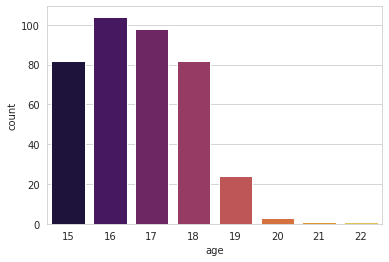

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='age',data=full_data,palette='inferno')

### Idade por gênero

In [15]:
# Em tabela
age_sex = pd.crosstab(full_data['sex'],
            full_data['age']).apply(lambda r: r/r.sum(), 
                                    axis=1)*100
age_sex

age,15,16,17,18,19,20,21,22
sex,,,,,,,,
F,18.269231,25.961538,27.884615,20.673077,6.730769,0.480769,0.000000,0.000000
M,23.529412,26.737968,21.390374,20.855615,5.347594,1.069519,0.534759,0.534759


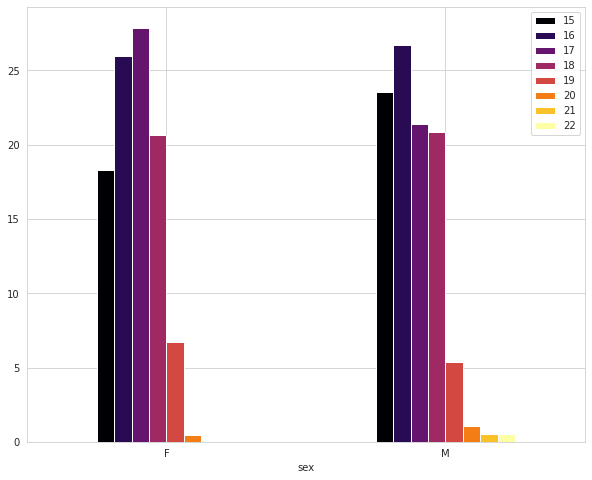

In [16]:
# Em representação gráfica
age_sex.plot.bar(rot=0 ,figsize=(10,8), colormap='inferno')
plt.legend();

### Representação geral do número de alunos por gênero

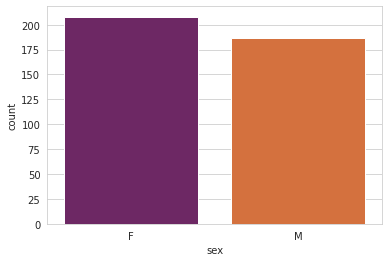

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=full_data, palette='inferno')

### Gênero por escola

In [18]:
# Em tabela
age_school = pd.crosstab(full_data['sex'],
            full_data['school'])
age_school

school,GP,MS
sex,,
F,183,25
M,166,21


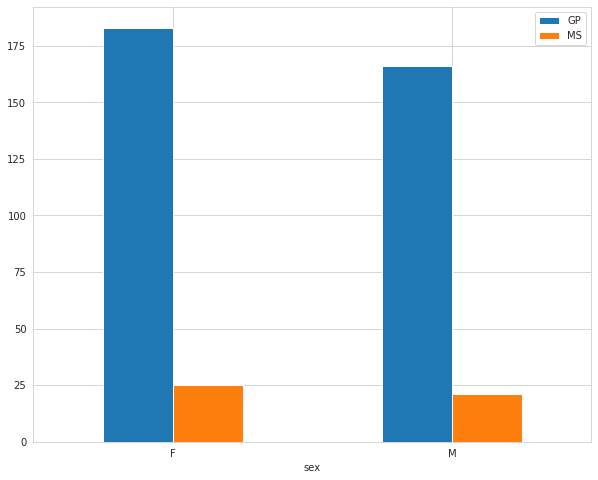

In [19]:
# Em representação gráfica
age_school.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();

### Tempo médio de estudo semanal por escola

In [20]:
# Em tabela
study_time_school = pd.crosstab(full_data['studytime'].mean(),
            full_data['school']).apply(lambda r: r/r.sum(), 
                                    axis=1)*100
study_time_school

school,GP,MS
row_0,,
2.035443,88.35443,11.64557


Text(0.5, 0, 'Escolas')

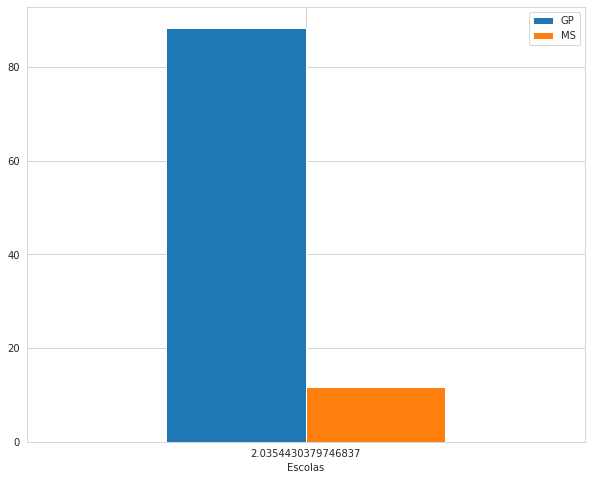

In [21]:
# Em representação gráfica
a = study_time_school.plot.bar(rot=0 ,figsize=(10,8))
plt.legend();
a.set_xlabel("Escolas")

## Tratamento dos dados

In [22]:
# Correlação entre as variáveis com a variável resposta pré tratamento dos dados
full_data.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [23]:
# Criando uma lista com as variáveis categóricas
var_categoricas = ['school', 'sex', 'address', 'famsize', 'Pstatus',
               'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
               'famsup', 'paid', 'activities', 'nursery', 'higher', 
               'internet', 'romantic']

In [24]:
# Transformando as variáveis categóricas em numéricas
le = LabelEncoder()
full_data[var_categoricas] = full_data[var_categoricas].apply(lambda col: le.fit_transform(col))

full_data[var_categoricas].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0
9,0,1,1,0,1,2,2,1,1,0,1,1,1,1,1,1,0


In [25]:
# Correlação entre as variáveis com a variável resposta pós tratamento dos dados
full_data.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [26]:
# Gerando um arquivo com o dataset tratado
full_data.to_csv('dataset_ajustado.csv', sep=',', index=False)

## Análise Exploratória - Pós Tratamento dos Dados

In [27]:
# Importando o dataset tratado
full_data = pd.read_csv('dataset_ajustado.csv', sep=',')

In [28]:
# Descartamos as variáveis escola, G1 e G2
# Sem as variáveis G1 e G2 dificulta prever a G3, mas queremos identificar realmente os fatores que levam à G3
full_data = full_data.drop(['school', 'G1', 'G2'], axis='columns')

In [29]:
# Atribuindo as correlações com o G3 a uma variável
maior_rel = full_data.corr().abs()['G3'].sort_values(ascending=False)

maior_rel

G3            1.000000
failures      0.360415
Medu          0.217147
higher        0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
romantic      0.129970
reason        0.121994
traveltime    0.117142
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
schoolsup     0.082788
famsize       0.081407
guardian      0.070109
health        0.061335
Pstatus       0.058009
Dalc          0.054660
Walc          0.051939
nursery       0.051568
famrel        0.051363
Fjob          0.042286
famsup        0.039157
absences      0.034247
activities    0.016100
freetime      0.011307
Name: G3, dtype: float64

### Fatores que podem influenciar na nota final dos alunos:

#### 1. A qualidade do relacionamento familiar pode influenciar as notas dos alunos?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Notas G3')

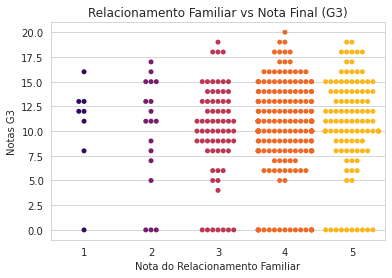

In [30]:
# Nota de 1 a 5, sendo 1 muito ruim e 5 excelente
a = sns.swarmplot(x=full_data['famrel'],y=full_data['G3'],palette='inferno')
a.axes.set_title('Relacionamento Familiar vs Nota Final (G3)')
a.set_xlabel("Nota do Relacionamento Familiar")
a.set_ylabel("Notas G3")

##### Conclusão: Podemos concluir que boa parte dos estudantes possui um bom relacionamento familiar.

#### 2. O tamanho da família pode influenciar na nota final? Será que filhos únicos possuem notas mais altas do que os que possuem irmãos?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Notas G3')

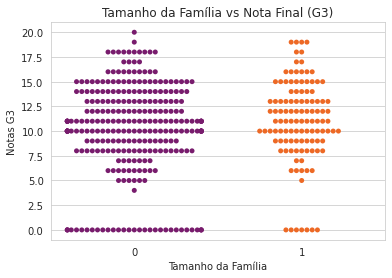

In [31]:
a = sns.swarmplot(x=full_data['famsize'],y=full_data['G3'],palette='inferno')
a.axes.set_title('Tamanho da Família vs Nota Final (G3)')
a.set_xlabel("Tamanho da Família")
a.set_ylabel("Notas G3")

##### Conclusão: De acordo com os dados levantados, os estudantes que fazem parte de famílias com mais de 3 integrantes possuem as notas maiores que aqueles estudantes que fazem parte de um ciclo familiar de até 3 pessoas.

#### 3. O nível de escolaridade dos pais pode influenciar na nota final dos alunos?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you m

Text(0, 0.5, 'Notas G3')

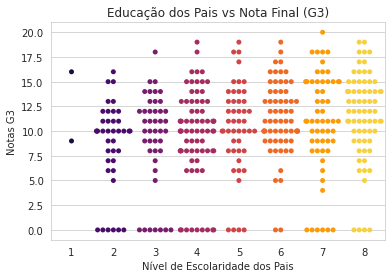

In [32]:
edu_pais = full_data['Fedu'] + full_data['Medu']
a = sns.swarmplot(x=edu_pais,y=full_data['G3'],palette='inferno')
a.axes.set_title('Educação dos Pais vs Nota Final (G3)')
a.set_xlabel("Nível de Escolaridade dos Pais")
a.set_ylabel("Notas G3")

##### Conclusão: Estudantes com pais que têm um bom nível de escoloridade possuem notas maiores.

#### 4. A mãe estar mais presente influencia nas notas dos alunos?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Notas G3')

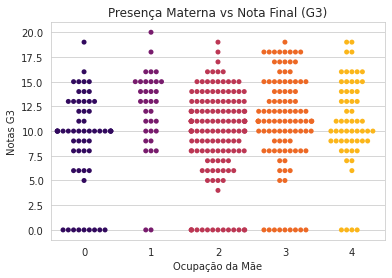

In [33]:
a = sns.swarmplot(x=full_data['Mjob'],y=full_data['G3'],palette='inferno')
a.axes.set_title('Presença Materna vs Nota Final (G3)')
a.set_xlabel("Ocupação da Mãe")
a.set_ylabel("Notas G3")

##### Conclusão: Boa parte dos estudantes possui uma mãe que trabalha fora e isso não influencia negativamente nas notas da maioria.

#### 5. A quantidade de faltas pode influenciar na nota final?

Text(0, 0.5, 'Quantidade de Faltas')

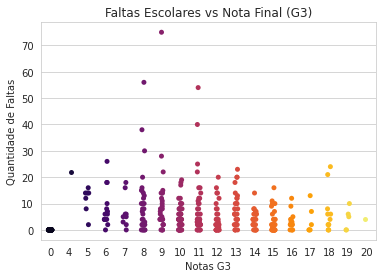

In [34]:
a = sns.stripplot(x=full_data['G3'],y=full_data['absences'],palette='inferno')
a.axes.set_title('Faltas Escolares vs Nota Final (G3)')
a.set_xlabel("Notas G3")
a.set_ylabel("Quantidade de Faltas")

##### Conclusão: A quantidade de faltas não influencia muito nas notas finais dos alunos.

#### 6. Ter acesso a internet pode influenciar na nota final dos alunos?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Acesso a Internet vs Nota Final (G3)')

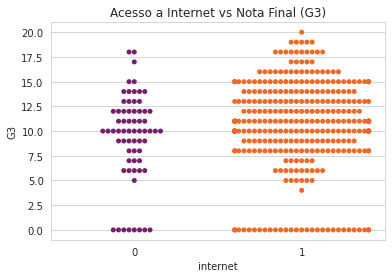

In [35]:
a = sns.swarmplot(x=full_data['internet'],y=full_data['G3'],palette='inferno')
a.axes.set_title('Acesso a Internet vs Nota Final (G3)')

##### Conclusão: Podemos concluir que ter acesso a internet influencia e muito nas notas dos estudantes.

#### 7. É grande o número de estudantes que consomem bebidas ilicitas, durante a semana e/ou aos finais de semana? Será que o consumo de álcool influenciaria nas notas dos alunos?

Text(0, 0.5, 'Quantidade de Respostas')

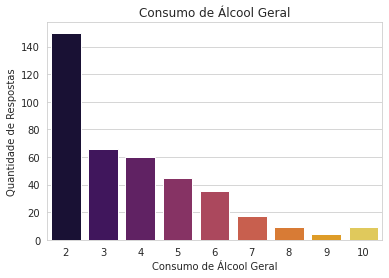

In [36]:
# Quantidade de alunos que consomem bebidas ilicitas
consumo_alcool = full_data['Dalc'] + full_data['Walc']
a = sns.countplot(x=consumo_alcool,data=full_data,palette='inferno')
a.axes.set_title('Consumo de Álcool Geral')
a.set_xlabel("Consumo de Álcool Geral")
a.set_ylabel("Quantidade de Respostas")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Notas G3')

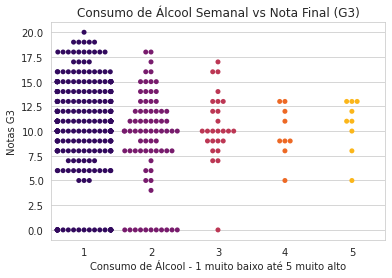

In [37]:
# Consumo de bebidas ilicitas durante a semana
a = sns.swarmplot(x=full_data['Dalc'],y=full_data['G3'],palette='inferno')
a.axes.set_title('Consumo de Álcool Semanal vs Nota Final (G3)')
a.set_xlabel("Consumo de Álcool - 1 muito baixo até 5 muito alto")
a.set_ylabel("Notas G3")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Notas G3')

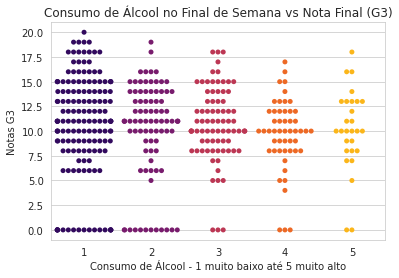

In [38]:
# Consumo de bebidas ilicitas no final de semana
a = sns.swarmplot(x=full_data['Walc'],y=full_data['G3'],palette='inferno')
a.axes.set_title('Consumo de Álcool no Final de Semana vs Nota Final (G3)')
a.set_xlabel("Consumo de Álcool - 1 muito baixo até 5 muito alto")
a.set_ylabel("Notas G3")

## Criando o modelo de ML

In [39]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from graphviz import render

import matplotlib.pyplot as plt

In [50]:
# Criando as variáveis de treino e teste
# 65% -> Treino e 35% -> Teste
X_train, X_test, y_train, y_test = train_test_split(full_data, 
                                                    full_data['G3'], 
                                                    test_size = 0.35, 
                                                    random_state=42)

In [60]:
X_train.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
287,0,17,1,0,1,1,1,3,4,3,1,1,3,0,0,1,1,0,1,1,1,0,4,3,3,1,1,3,6,12
152,0,15,0,0,1,3,3,3,3,3,2,2,3,2,0,1,1,1,1,1,1,1,4,2,1,2,3,3,8,10
349,1,18,0,0,1,3,2,2,2,0,1,2,1,1,0,1,0,0,0,1,1,0,2,5,5,5,5,5,10,13
382,1,17,1,0,1,2,3,2,3,1,0,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,2,10
59,0,16,1,0,1,4,2,3,2,0,1,1,2,0,0,1,0,0,1,1,1,0,4,2,3,1,1,5,2,16


In [59]:
print('Quantidade de dados de treino e teste (X variáveis e y resposta):'
      '\n>> Treino X {trainX}\n>> Treino y {trainY}'
      '\n>> Teste X {testX}\n>> Teste y {testY}'.format(trainX=X_train.shape,
                                                        trainY=y_train.shape,
                                                        testX=X_test.shape, 
                                                        testY=y_test.shape))

Quantidade de dados de treino e teste (X variáveis e y resposta):
>> Treino X (256, 30)
>> Treino y (256,)
>> Teste X (139, 30)
>> Teste y (139,)


In [53]:
# Calculando a métrica de % de erro de treino e teste
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))

    return mae

''' Escolhemos o Mean Absolute Percentage Error devido ser a melhor
métrica para se calcular a % de erro em algoritmos em que as 
variáveis são valores e não categóricos. '''

In [55]:
# Calculando as médias
median_pred = X_train['G3'].median()

# Criando uma lista com os valores das médias
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [57]:
mb_mae = evaluate_predictions(median_preds, true)
print('Média baseada no MAE: {:.4f}'.format(mb_mae))

Média baseada no MAE: 3.7770


In [ ]:
regr_1 = LinearRegression()
regr_1.fit(X, y)